In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, PowerTransformer, RobustScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

In [108]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [109]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

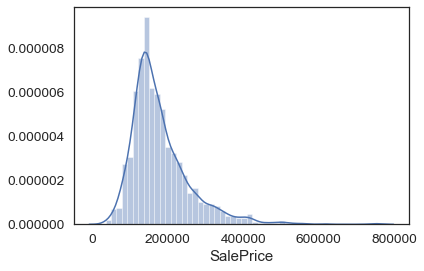

In [110]:
sns.distplot(train['SalePrice'])

In [111]:
train['SalePrice'].describe()

count      1751.000000
mean     179176.913237
std       78702.014153
min       34900.000000
25%      129000.000000
50%      159434.000000
75%      211413.386693
max      755000.000000
Name: SalePrice, dtype: float64

In [112]:
data=train[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF', 'SalePrice']]

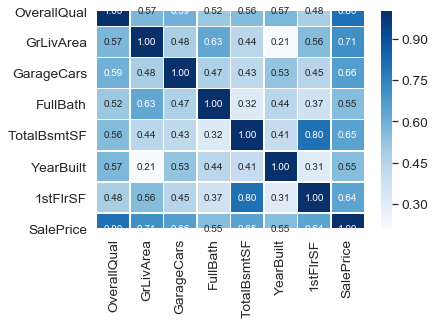

In [113]:
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap="Blues")

In [114]:
null_gp = pd.DataFrame({'feature': train.columns, 'null':train.isnull().sum()})

[Text(0, 0, 'PoolQC'),
 Text(0, 0, 'MiscFeature'),
 Text(0, 0, 'Alley'),
 Text(0, 0, 'Fence'),
 Text(0, 0, 'FireplaceQu'),
 Text(0, 0, 'LotFrontage'),
 Text(0, 0, 'GarageYrBlt'),
 Text(0, 0, 'GarageQual'),
 Text(0, 0, 'GarageCond'),
 Text(0, 0, 'GarageFinish'),
 Text(0, 0, 'GarageType'),
 Text(0, 0, 'BsmtCond'),
 Text(0, 0, 'BsmtQual'),
 Text(0, 0, 'BsmtExposure'),
 Text(0, 0, 'BsmtFinType1')]

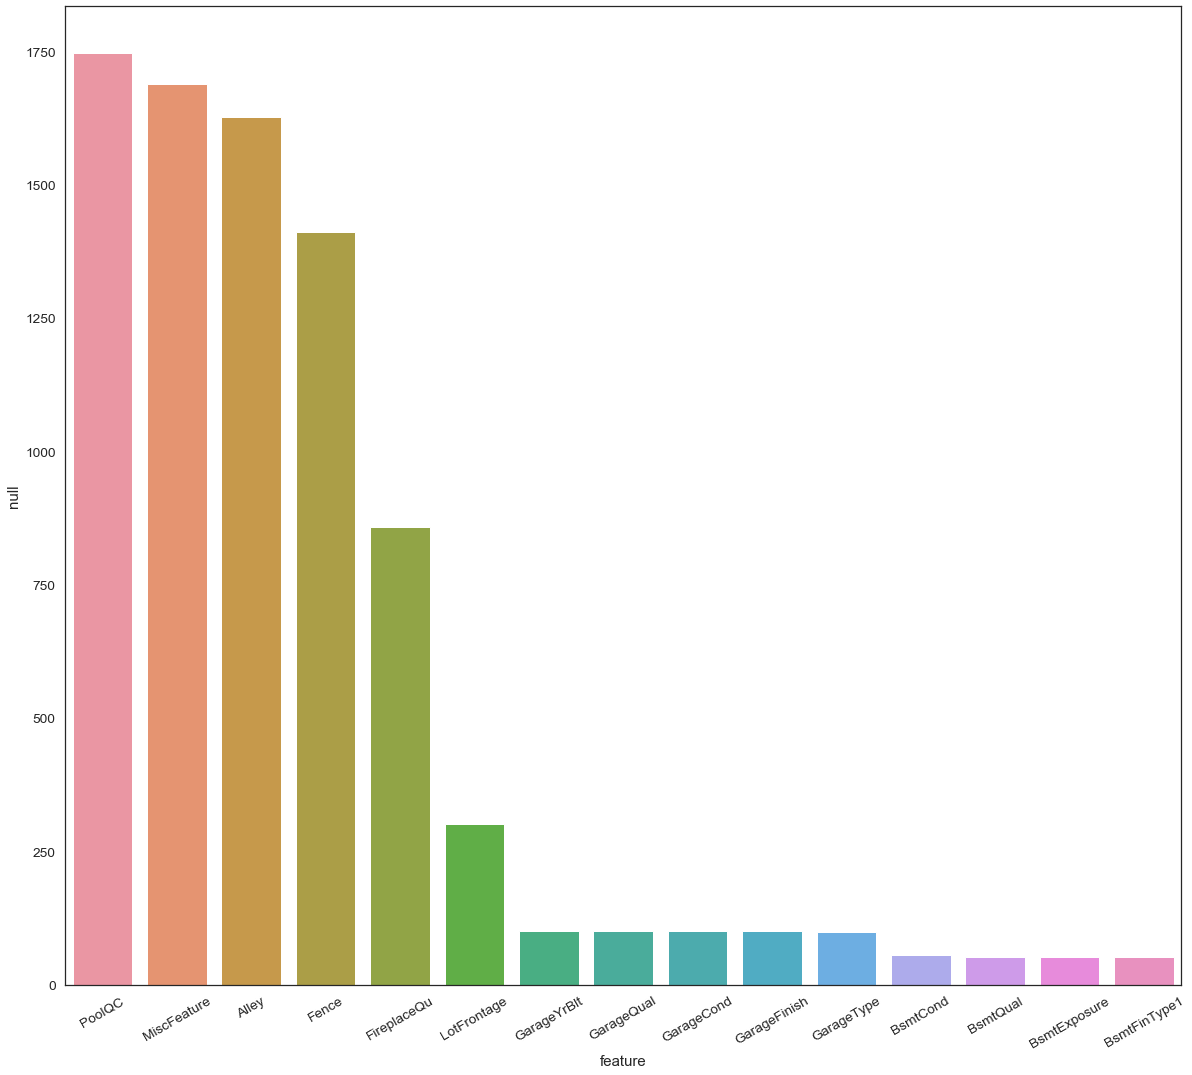

In [115]:
plt.figure(figsize=(20,18))
ax = sns.barplot(x='feature', y='null', data=null_gp.sort_values(['null'], ascending=False).iloc[:15,:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [116]:
train.shape

(1751, 81)

In [117]:
test.shape

(1168, 80)

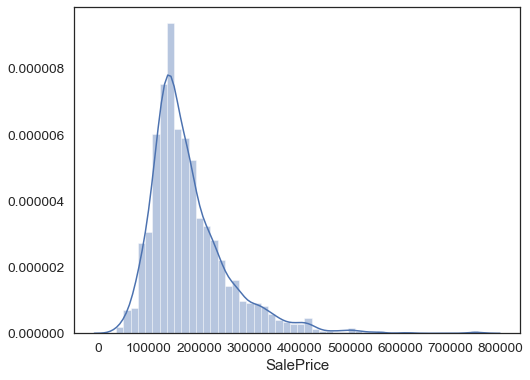

In [118]:
f, ax = plt.subplots(figsize=(8,6))
sns.distplot(train['SalePrice'])

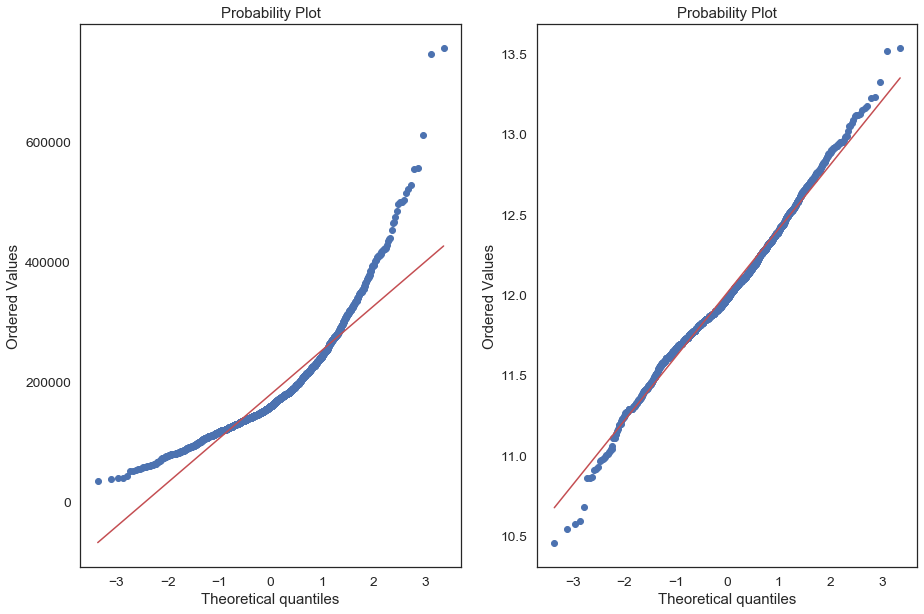

In [119]:
fig = plt.figure(figsize=(15, 10))

fig.add_subplot(1,2,1)
res = stats.probplot(train['SalePrice'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train['SalePrice']), plot=plt)

In [120]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [121]:
train['SalePrice'].head()

0    12.310437
1    11.872354
2    12.305923
3    12.156203
4    12.100718
Name: SalePrice, dtype: float64

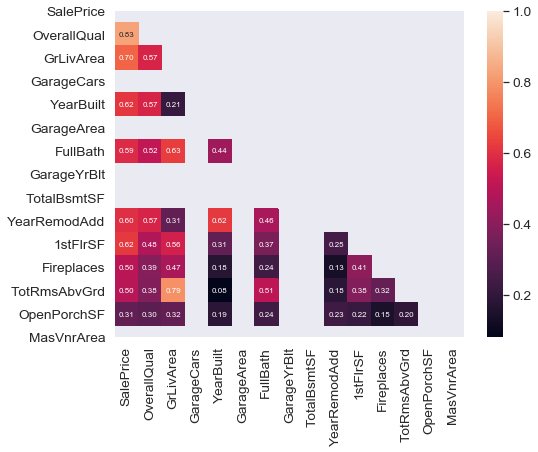

In [122]:
k = 15 #number of variables for heatmap
corrmat = abs(train.corr(method='spearman')) # correlation 전체 변수에 대해서 계산
cols = corrmat.nlargest(k, 'SalePrice').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(train[cols].values.T) # correlation 특정 컬럼에 대해서
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))

#Sokratis Kouvaras help to hide upper symmetric metrics
mask = np.zeros_like(cm) 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("white")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values, mask = mask)
plt.show()


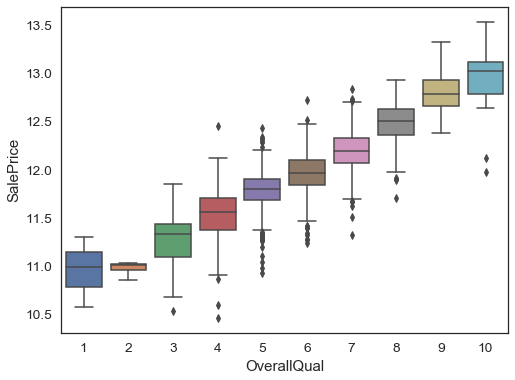

In [123]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

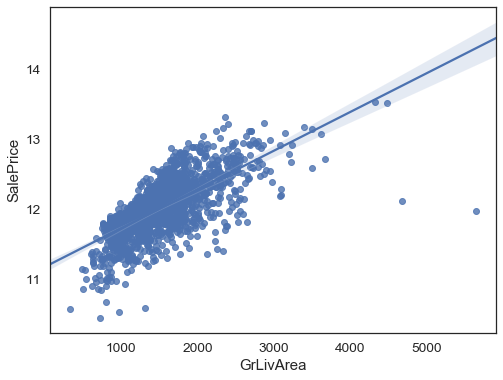

In [124]:
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GrLivArea', y="SalePrice", data=data)

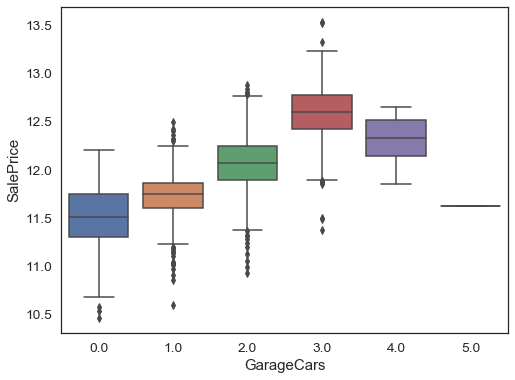

In [125]:
data = pd.concat([train['SalePrice'], train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

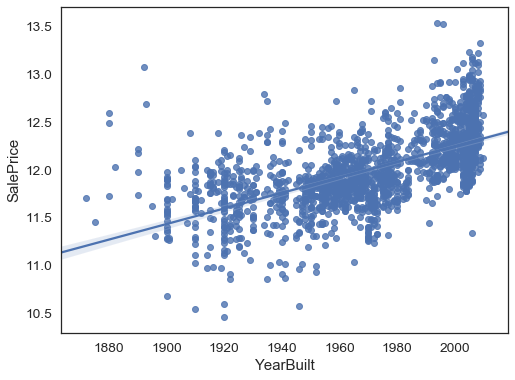

In [126]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='YearBuilt', y="SalePrice", data=data)

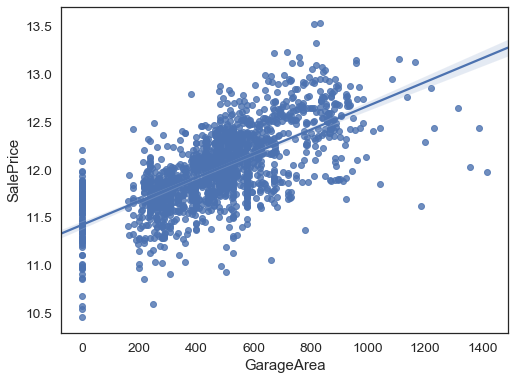

In [127]:
data = pd.concat([train['SalePrice'], train['GarageArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='GarageArea', y="SalePrice", data=data)

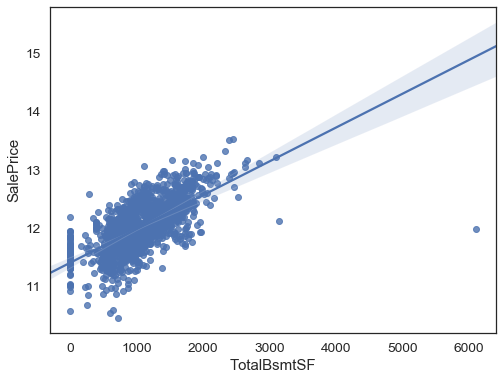

In [128]:
data = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='TotalBsmtSF', y="SalePrice", data=data)

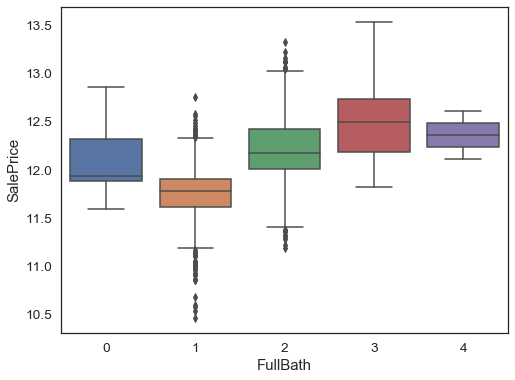

In [129]:
data = pd.concat([train['SalePrice'], train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)

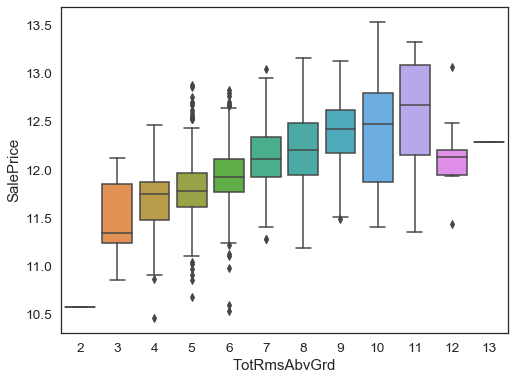

In [130]:
data = pd.concat([train['SalePrice'], train['TotRmsAbvGrd']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='TotRmsAbvGrd', y="SalePrice", data=data)

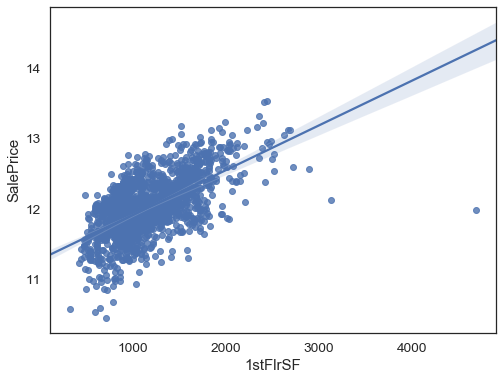

In [131]:
data = pd.concat([train['SalePrice'], train['1stFlrSF']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='1stFlrSF', y="SalePrice", data=data)

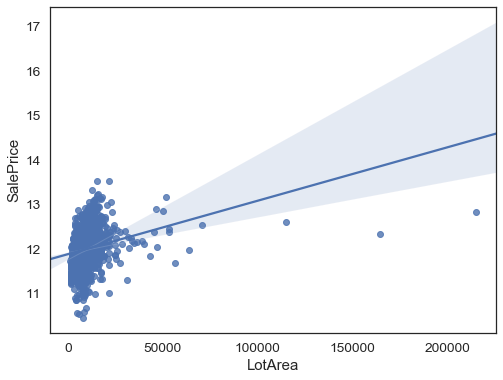

In [132]:
data = pd.concat([train['SalePrice'], train['LotArea']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='LotArea', y="SalePrice", data=data)

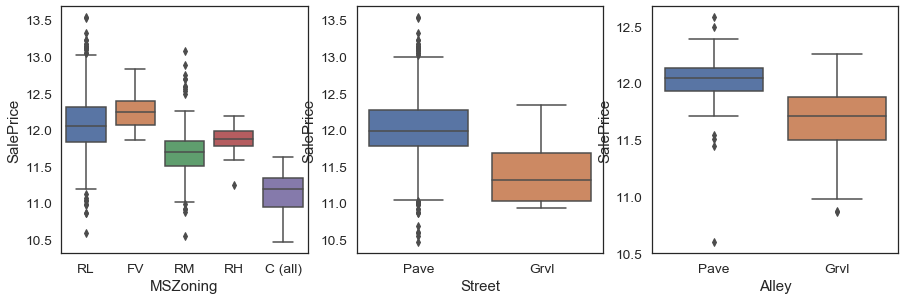

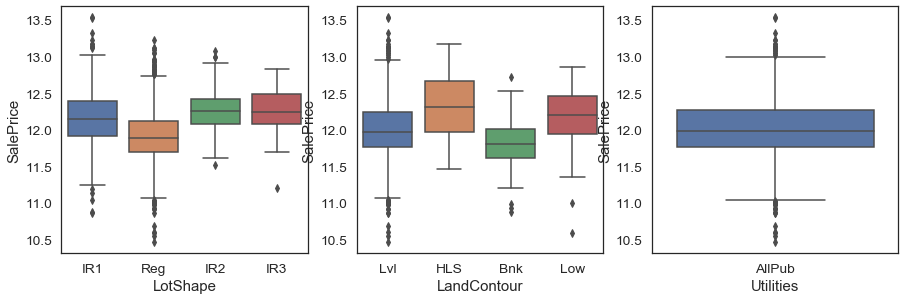

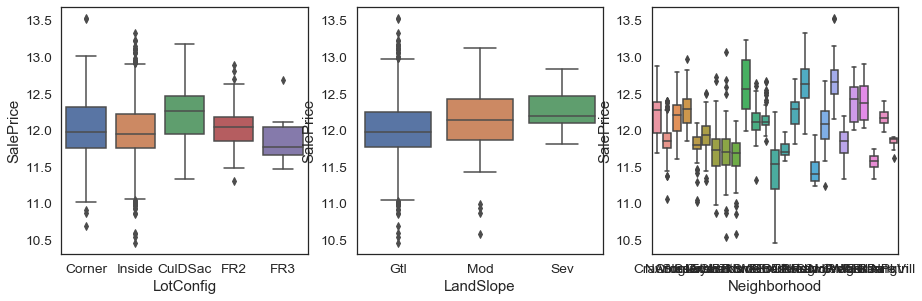

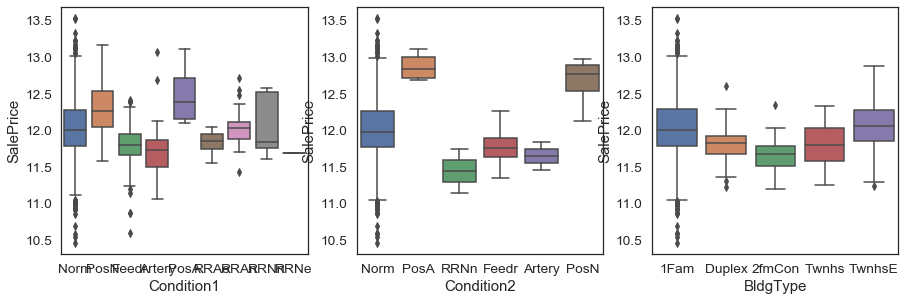

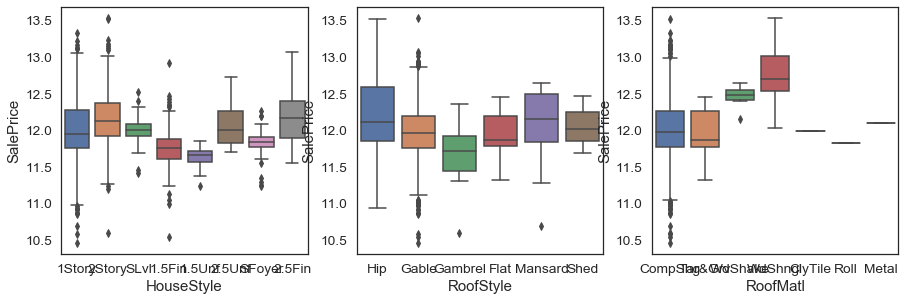

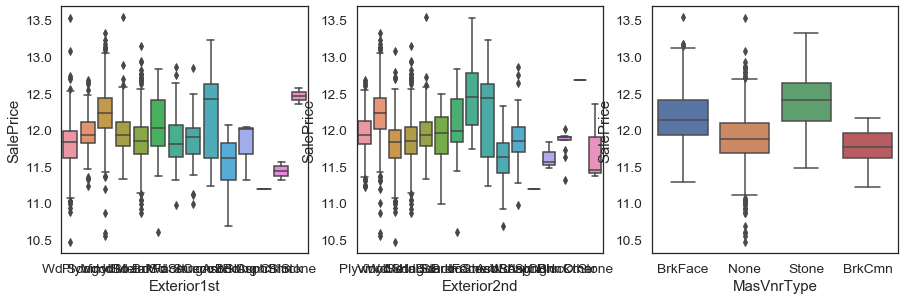

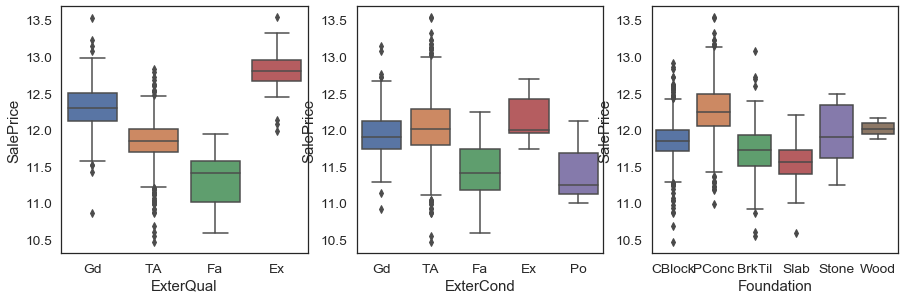

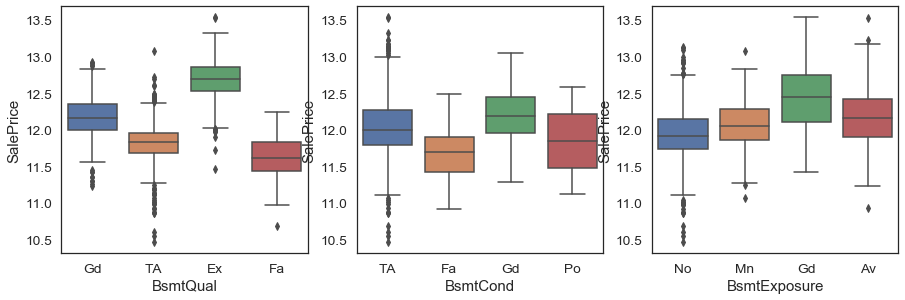

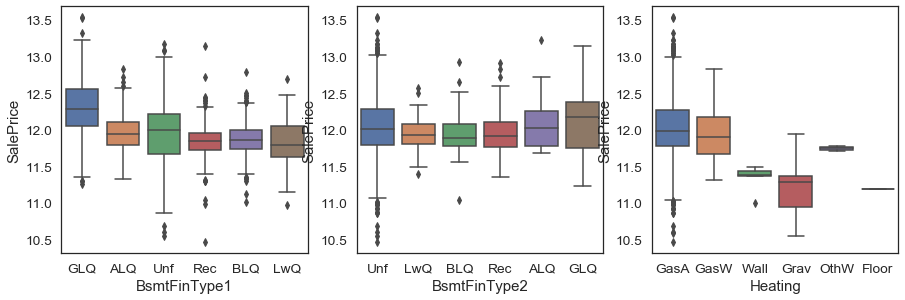

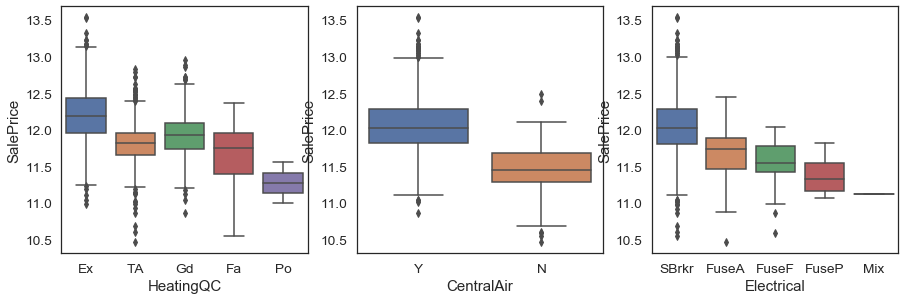

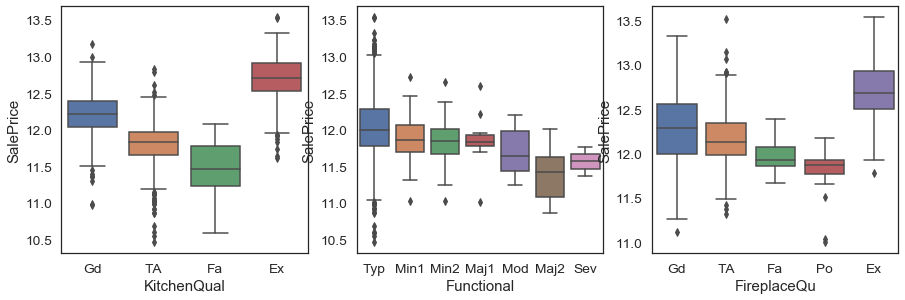

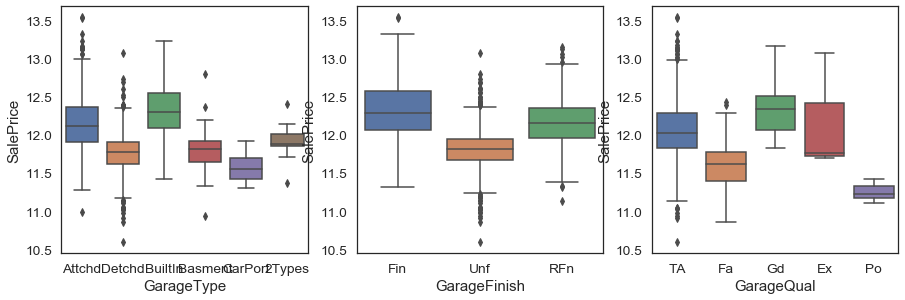

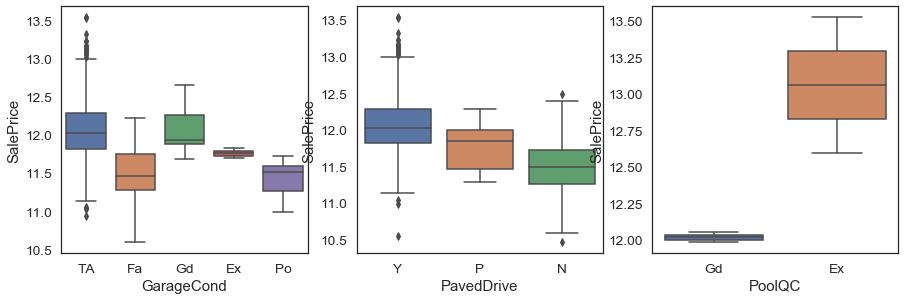

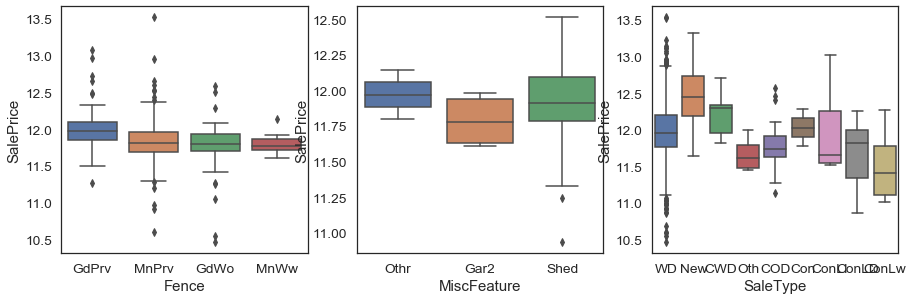

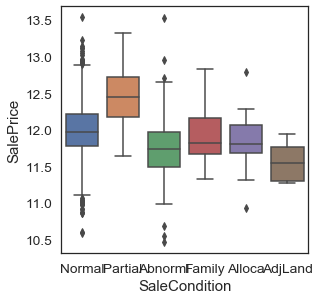

In [133]:
categorical_features = train.select_dtypes(include = ["object"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(train[categorical_features]):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=train, x=c, y='SalePrice', ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

Text(0.5, 1.0, 'Total Missing Value (%)')

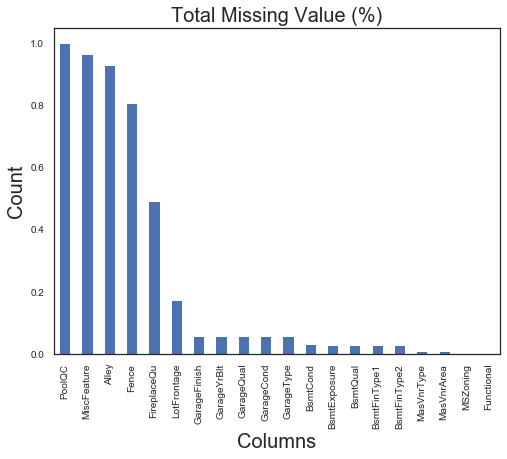

In [134]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

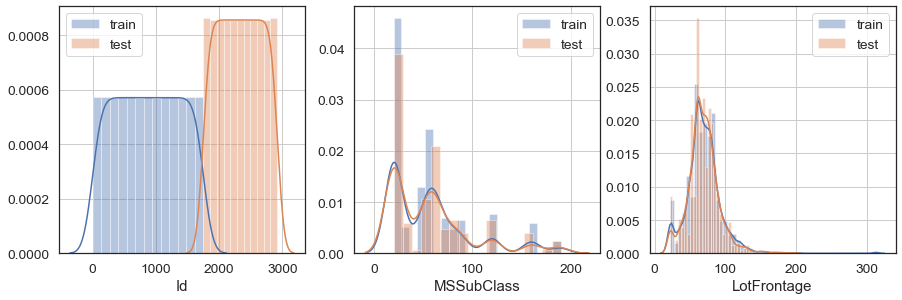

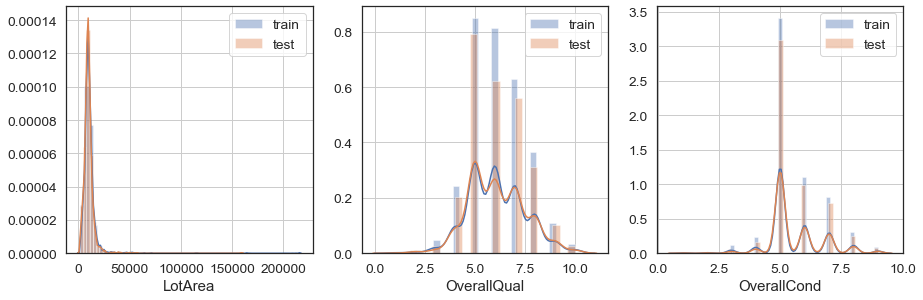

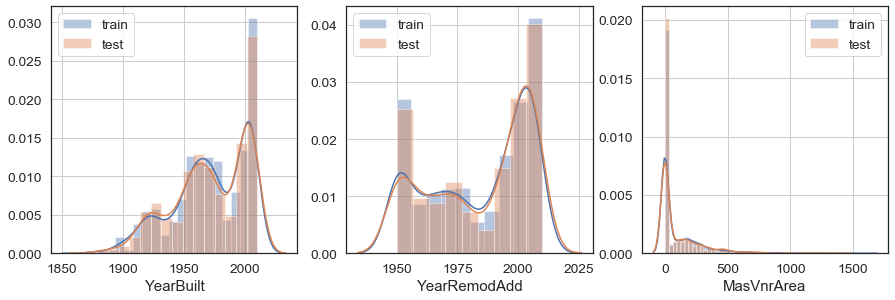

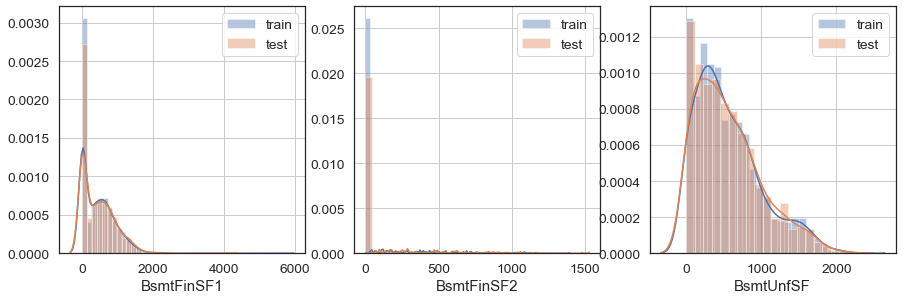

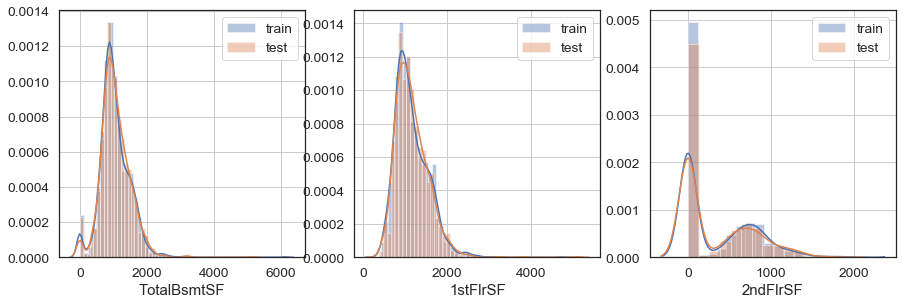

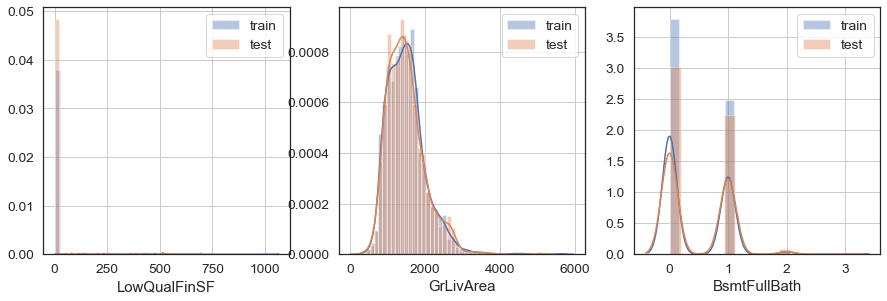

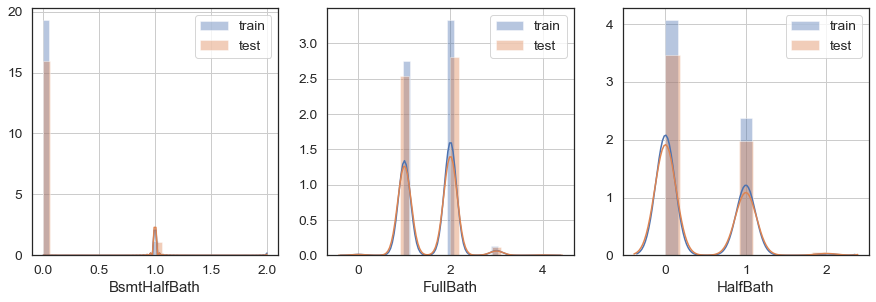

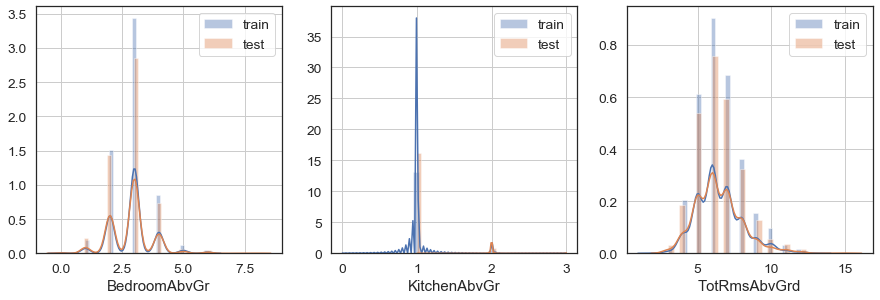

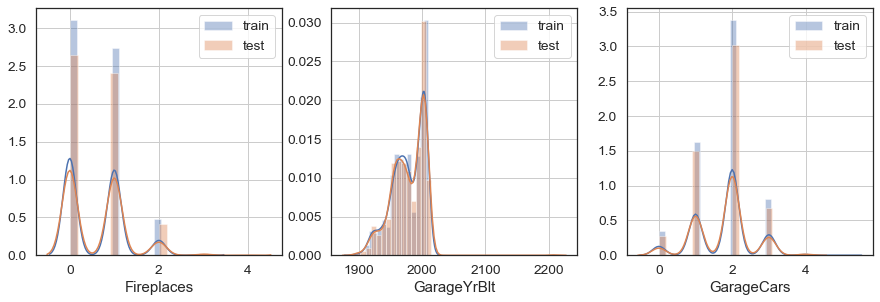

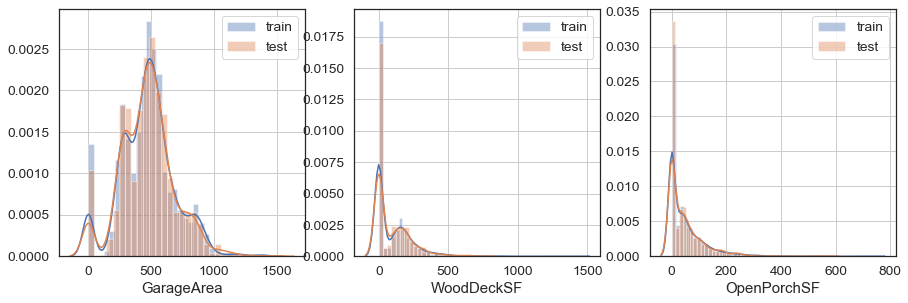

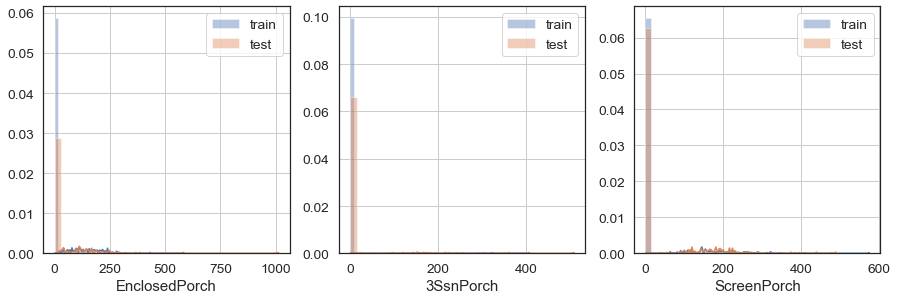

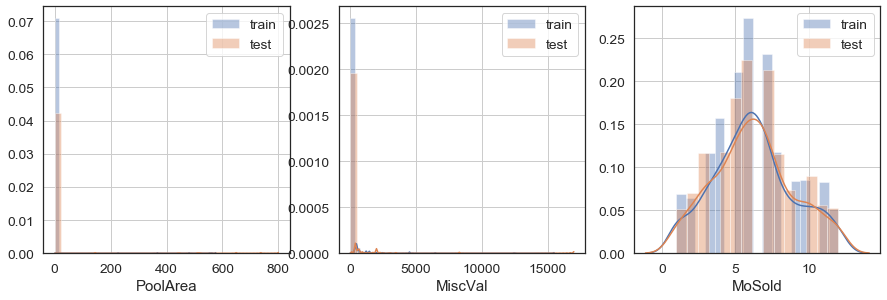

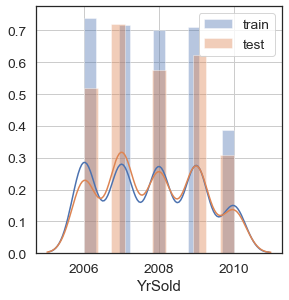

In [135]:
Numeric = train.copy()
del Numeric['SalePrice']
Numeric_columns = Numeric.select_dtypes(include = ["int64","float64"]).columns

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(Numeric_columns):
    if ix <= 3:
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(train[c].dropna())
            sns.distplot(test[c].dropna())
            plt.legend(['train', 'test'])
            plt.grid()            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1
del Numeric

In [136]:
# Deleting outliers
train = train[train['Id'] != 350][train['Id'] != 933]

# drop outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<12.5)].index)
train = train.drop(train[(train['LotArea']>150000)].index)
train = train.drop(train[(train['GarageArea']>1200) & (train['SalePrice']<12.5)].index)

Text(0.5, 1.0, 'Total Missing Value (%)')

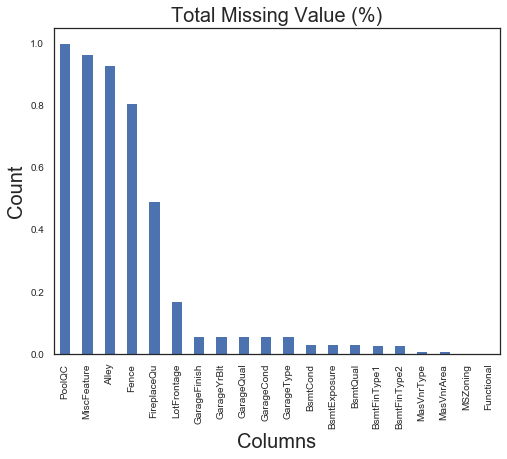

In [137]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

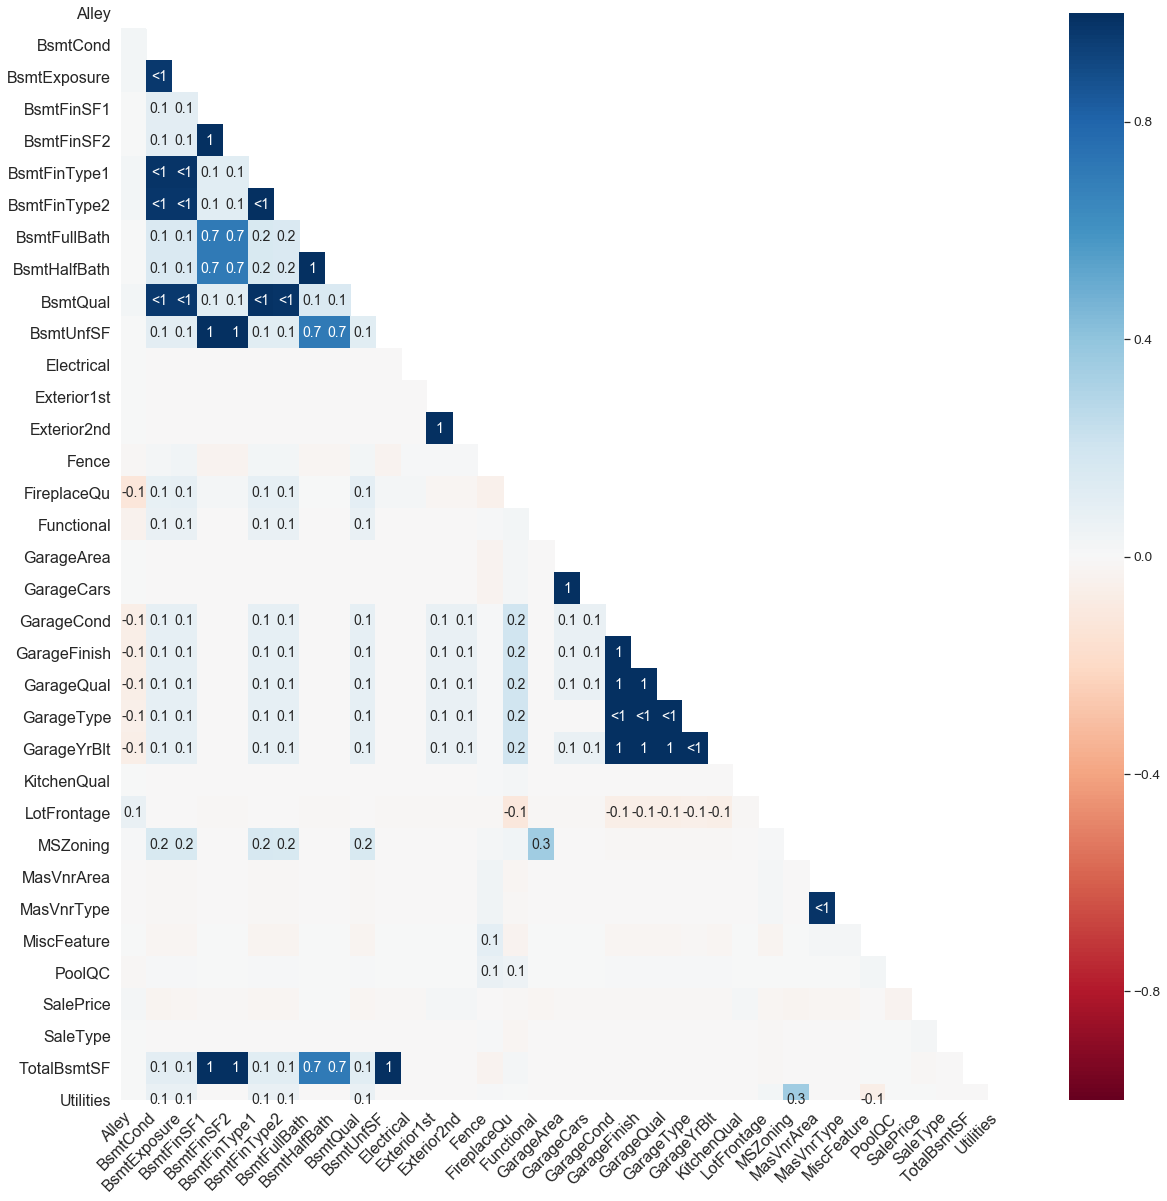

In [138]:
import missingno as msno
len_train = train.shape[0]
y_reg = train['SalePrice']
Id = test['Id']
df_all = pd.concat([train,test])
del df_all['Id']
missingdata_df = df_all.columns[df_all.isnull().any()].tolist()
msno.heatmap(df_all[missingdata_df], figsize=(20,20))

In [139]:
df_all['Utilities'].unique()

array(['AllPub', nan, 'NoSeWa'], dtype=object)

In [140]:
df_all['Utilities'].describe()

count       2908
unique         2
top       AllPub
freq        2907
Name: Utilities, dtype: object

In [141]:
del df_all['Utilities']

In [142]:
df_all["PoolQC"] = df_all["PoolQC"].fillna("None")
df_all["MiscFeature"] = df_all["MiscFeature"].fillna("None")
df_all["Alley"] = df_all["Alley"].fillna("None")
df_all["Fence"] = df_all["Fence"].fillna("None")
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna("None")
df_all['BsmtQual'] = df_all['BsmtQual'].fillna('None')
df_all['BsmtCond'] = df_all['BsmtCond'].fillna('None')
df_all['BsmtExposure'] = df_all['BsmtExposure'].fillna('None')
df_all['BsmtFinType1'] = df_all['BsmtFinType1'].fillna('None')
df_all['BsmtFinType2'] = df_all['BsmtFinType2'].fillna('None')
df_all['GarageType'] = df_all['GarageType'].fillna('None')
df_all['GarageFinish'] = df_all['GarageFinish'].fillna('None')
df_all['GarageQual'] = df_all['GarageQual'].fillna('None')
df_all['GarageCond'] = df_all['GarageCond'].fillna('None')

In [143]:
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(0)
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(0)
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(0)
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(0)
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna(0)
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(0)
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)
df_all['GarageCars'] = df_all['GarageCars'].fillna(0)
df_all['GarageArea'] = df_all['GarageArea'].fillna(0)

In [144]:
df_all['MSZoning'] = df_all['MSZoning'].fillna(df_all['MSZoning'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(df_all['Exterior2nd'].mode()[0])
df_all['MasVnrType'] = df_all['MasVnrType'].fillna(df_all['MasVnrType'].mode()[0])
df_all['Electrical'] = df_all['Electrical'].fillna(df_all['Electrical'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(df_all['KitchenQual'].mode()[0])
df_all['Functional'] = df_all['Functional'].fillna(df_all['Functional'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [145]:
df_all[df_all['Neighborhood']=='BrkSide']['LotFrontage'].describe()

count     95.000000
mean      55.789474
std       12.722818
min       50.000000
25%       50.000000
50%       51.000000
75%       58.500000
max      144.000000
Name: LotFrontage, dtype: float64

In [146]:
df_all[df_all['Neighborhood']=='CollgCr']['LotFrontage'].describe()

count    219.000000
mean      71.251142
std       15.926607
min       36.000000
25%       64.000000
50%       70.000000
75%       78.000000
max      133.000000
Name: LotFrontage, dtype: float64

In [147]:
df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Text(0.5, 1.0, 'Total Missing Value (%)')

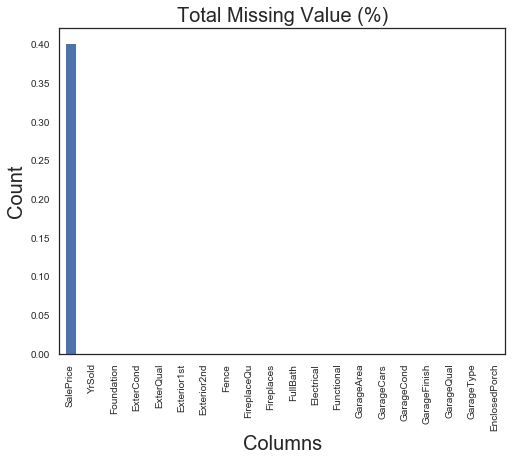

In [148]:
#missing data
total = df_all.isnull().sum().sort_values(ascending=False)
percent = (df_all.isnull().sum()/df_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#histogram
#missing_data = missing_data.head(20)
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

In [149]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(str)

# Changing OverallCond into a categorical variable
df_all['OverallCond'] = df_all['OverallCond'].astype(str)

In [150]:
categorical_features = df_all.select_dtypes(include = ["object"]).columns
numerical_features = df_all.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))

Numerical features : 34
Categorical features : 44


In [151]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding = df_all.copy()
one_hot_encoding = pd.get_dummies(one_hot_encoding)
#len_train
one_hot_encoding.iloc[:,36:50].head()

,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd
0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [152]:
one_hot_encoding.shape

(2910, 323)

In [153]:
df_all.shape

(2910, 79)

In [154]:
del one_hot_encoding

In [155]:
label_encoding = df_all.copy()
for i in categorical_features:
    label_encoding[i], indexer = pd.factorize(label_encoding[i])
label_encoding.iloc[:,20:30].head()

,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath
0,0,0,0,0,0,0,0,1,0,2
1,40,1,1,1,0,0,1,0,0,1
2,0,1,0,2,1,0,2,1,1,2
3,0,1,0,0,2,1,2,1,1,2
4,180,1,1,1,0,2,2,1,0,2


In [156]:
del label_encoding

In [157]:
frequency_encoding_all = df_all.copy()
    
def frequency_encoding(frame, col):
    freq_encoding = frame.groupby([col]).size()/frame.shape[0] 
    freq_encoding = freq_encoding.reset_index().rename(columns={0:'{}_Frequency'.format(col)})
    return frame.merge(freq_encoding, on=col, how='left')

for col in categorical_features:
    frequency_encoding_all = frequency_encoding(frequency_encoding_all, col)
frequency_encoding_all = frequency_encoding_all.drop(categorical_features,axis=1, inplace=False)
frequency_encoding_all.iloc[:,20:30].head()

,LowQualFinSF,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd
0,0,260.0,0,12,44,6,0,12.310437,0,5
1,0,0.0,0,3,312,6,0,11.872354,0,5
2,0,99.0,0,9,36,7,0,12.305923,0,6
3,0,0.0,0,11,382,7,0,12.156203,110,6
4,0,0.0,0,7,96,5,0,12.100718,0,7


In [158]:
del frequency_encoding_all

In [159]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

#K-folds Validation function
n_folds = 5 # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [160]:
one_hot_encoding = df_all.copy()
del one_hot_encoding['SalePrice']
one_hot_encoding = pd.get_dummies(one_hot_encoding)
one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]
del one_hot_encoding

import lightgbm as lgb

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.05, n_estimators=720,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  
score = rmsle_cv(model,one_hot_encoding_train)  
print("One-hot encoding(5-folds) LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

kfold_lgb_model = model.fit(one_hot_encoding_train, y_reg)
train_prediction = model.predict(one_hot_encoding_train)
prediction = np.expm1(kfold_lgb_model.predict(one_hot_encoding_test.values))
submission = pd.DataFrame({'Id': Id, 'SalePrice': prediction})
submission.to_csv('OH_5FOLD.csv', index=False)

One-hot encoding(5-folds) LGBM score: 0.0867 (0.0117)



In [161]:
#K-folds Validation function
n_folds = one_hot_encoding_train.shape[0] # if LOOCV k = df_train.shape[0]

def rmsle_cv(model,df):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df.values)
    rmse= np.sqrt(-cross_val_score(model, df.values, y_reg, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [162]:
one_hot_encoding = pd.concat([one_hot_encoding_train,one_hot_encoding_test])
one_hot_encoding['Total_sqr_footage'] = one_hot_encoding['BsmtFinSF1'] + one_hot_encoding['BsmtFinSF2'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF']
one_hot_encoding['Total_Bathrooms'] = one_hot_encoding['FullBath'] + one_hot_encoding['HalfBath'] + one_hot_encoding['BsmtFullBath'] + one_hot_encoding['BsmtHalfBath']
one_hot_encoding['Total_porch_sf'] = one_hot_encoding['OpenPorchSF'] + one_hot_encoding['3SsnPorch'] + one_hot_encoding['EnclosedPorch'] + one_hot_encoding['ScreenPorch'] + one_hot_encoding['WoodDeckSF'] 
one_hot_encoding['TotalHouse'] = one_hot_encoding['TotalBsmtSF'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF']
one_hot_encoding['TotalArea'] = one_hot_encoding['TotalBsmtSF'] + one_hot_encoding['1stFlrSF'] + one_hot_encoding['2ndFlrSF'] + one_hot_encoding["GarageArea"]
one_hot_encoding['GrLivArea_OverallQual'] = one_hot_encoding['GrLivArea'] * one_hot_encoding['OverallQual']
one_hot_encoding['LotArea_OverallQual'] = one_hot_encoding['LotArea'] * one_hot_encoding['OverallQual']

In [163]:
one_hot_encoding['haspool'] = one_hot_encoding['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasgarage'] = one_hot_encoding['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasbsmt'] = one_hot_encoding['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
one_hot_encoding['hasfireplace'] = one_hot_encoding['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [164]:
from scipy.stats import skew

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in one_hot_encoding.columns:
    if one_hot_encoding[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = one_hot_encoding[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews.head()

,skew
MiscVal,21.928742
PoolArea,18.685646
haspool,16.172484
LowQualFinSF,12.069749
3SsnPorch,11.358122


In [165]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

high_skew = skew_features[skew_features > 0.5]
high_skew = high_skew
skew_index = high_skew.index

for i in skew_index:
    one_hot_encoding[i]= boxcox1p(one_hot_encoding[i], boxcox_normmax(one_hot_encoding[i]+1))

        
skew_features2 = one_hot_encoding[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews2 = pd.DataFrame({'skew':skew_features2})
skews2.head()

,skew
PoolArea,16.275973
haspool,16.172484
3SsnPorch,8.851188
LowQualFinSF,8.482151
MiscVal,5.258415


# DeepLearning

In [213]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [215]:
sc = StandardScaler()
sc.fit(pd.concat([one_hot_encoding_train, one_hot_encoding_test]))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [216]:
one_hot_encoding_train_sc = sc.transform(one_hot_encoding_train)
one_hot_encoding_test_sc = sc.transform(one_hot_encoding_test)

In [183]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [217]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(512, kernel_initializer='normal', activation='relu', input_shape=(one_hot_encoding_train_sc.shape[1],)))
    model.add(layers.Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(64, kernel_initializer='normal', activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer ='rmsprop',loss='mse', metrics =['mse'])
    return model

In [219]:
k = 4
num_val_samples = len(one_hot_encoding_train_sc) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = one_hot_encoding_train_sc[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_reg[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [one_hot_encoding_train_sc[:i * num_val_samples],
         one_hot_encoding_train_sc[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_reg[:i * num_val_samples],
         y_reg[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [220]:
all_scores

[1.2578636169433595, 1.691108819876594, 1.1283718870974135, 1.3995889811680235]

In [221]:
np.mean(all_scores)

1.3692333262713476

In [226]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [225]:
num_epochs = 1
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = one_hot_encoding_train_sc[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_reg[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [one_hot_encoding_train_sc[:i * num_val_samples],
         one_hot_encoding_train_sc[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_reg[:i * num_val_samples],
         y_reg[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0


KeyError: 'val_mean_absolute_error'

In [ ]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [211]:
hist = model.fit(one_hot_encoding_train_sc, y_reg, epochs=200, batch_size=10,  verbose=1, validation_split=0.3)

Train on 1219 samples, validate on 523 samples
Epoch 1/200
1219/1219 [==============================] - 1s 567us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 2/200
1219/1219 [==============================] - 0s 319us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 3/200
1219/1219 [==============================] - 0s 285us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 4/200
1219/1219 [==============================] - 0s 281us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 5/200
1219/1219 [==============================] - 0s 281us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 6/200
1219/1219 [==============================] - 0s 293us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 7/200
1219/1219 [

1219/1219 [==============================] - 0s 276us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 106/200
1219/1219 [==============================] - 0s 284us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 107/200
1219/1219 [==============================] - 0s 285us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 108/200
1219/1219 [==============================] - 0s 276us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 109/200
1219/1219 [==============================] - 0s 279us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 110/200
1219/1219 [==============================] - 0s 289us/step - loss: nan - mean_squared_error: nan - val_loss: nan - val_mean_squared_error: nan
Epoch 111/200
1219/1219 [==============================] - 0s 276us/step

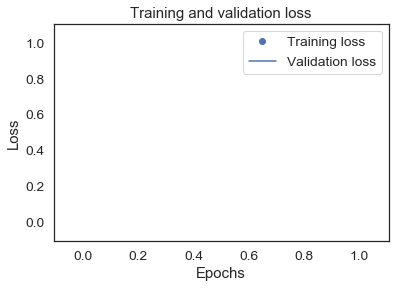

In [212]:
acc = hist.history['mean_squared_error']
val_acc = hist.history['val_mean_squared_error']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [208]:
plt.clf()   # 그래프를 초기화합니다
acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [ ]:
test_mae_score

Text(0, 0.5, 'score')

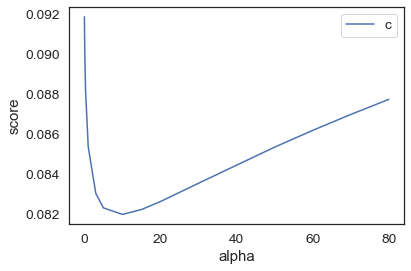

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import RidgeCV

one_hot_encoding_train = one_hot_encoding[:len_train]
one_hot_encoding_test = one_hot_encoding[len_train:]
del one_hot_encoding

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, one_hot_encoding_train, y_reg, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(one_hot_encoding_train, y_reg)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)

r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)
    
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

In [167]:
alphas_alt = [9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1,10.2]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(one_hot_encoding_train, y_reg)

print("Ridge rmse : ",cv_rmse(ridge_model2).mean())

Ridge rmse :  0.08198363473487522


In [168]:
print("Best of alpha in ridge model :" ,ridge_model2.steps[1][1].alpha_)

Best of alpha in ridge model : 9.0


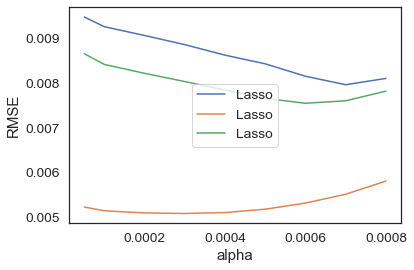

In [169]:
from sklearn.linear_model import LassoCV

alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]


lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,
                                    random_state = 42)).fit(one_hot_encoding_train, y_reg)
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [170]:
print("Best of alpha in lasso model :",lasso_model2.steps[1][1].alpha_)
print("lasso rmse : ",cv_rmse(lasso_model2).mean())

Best of alpha in lasso model : 0.0002
lasso rmse :  0.08346101970689274


[Text(0.5, 0, 'Penalized Regression Coefficients')]

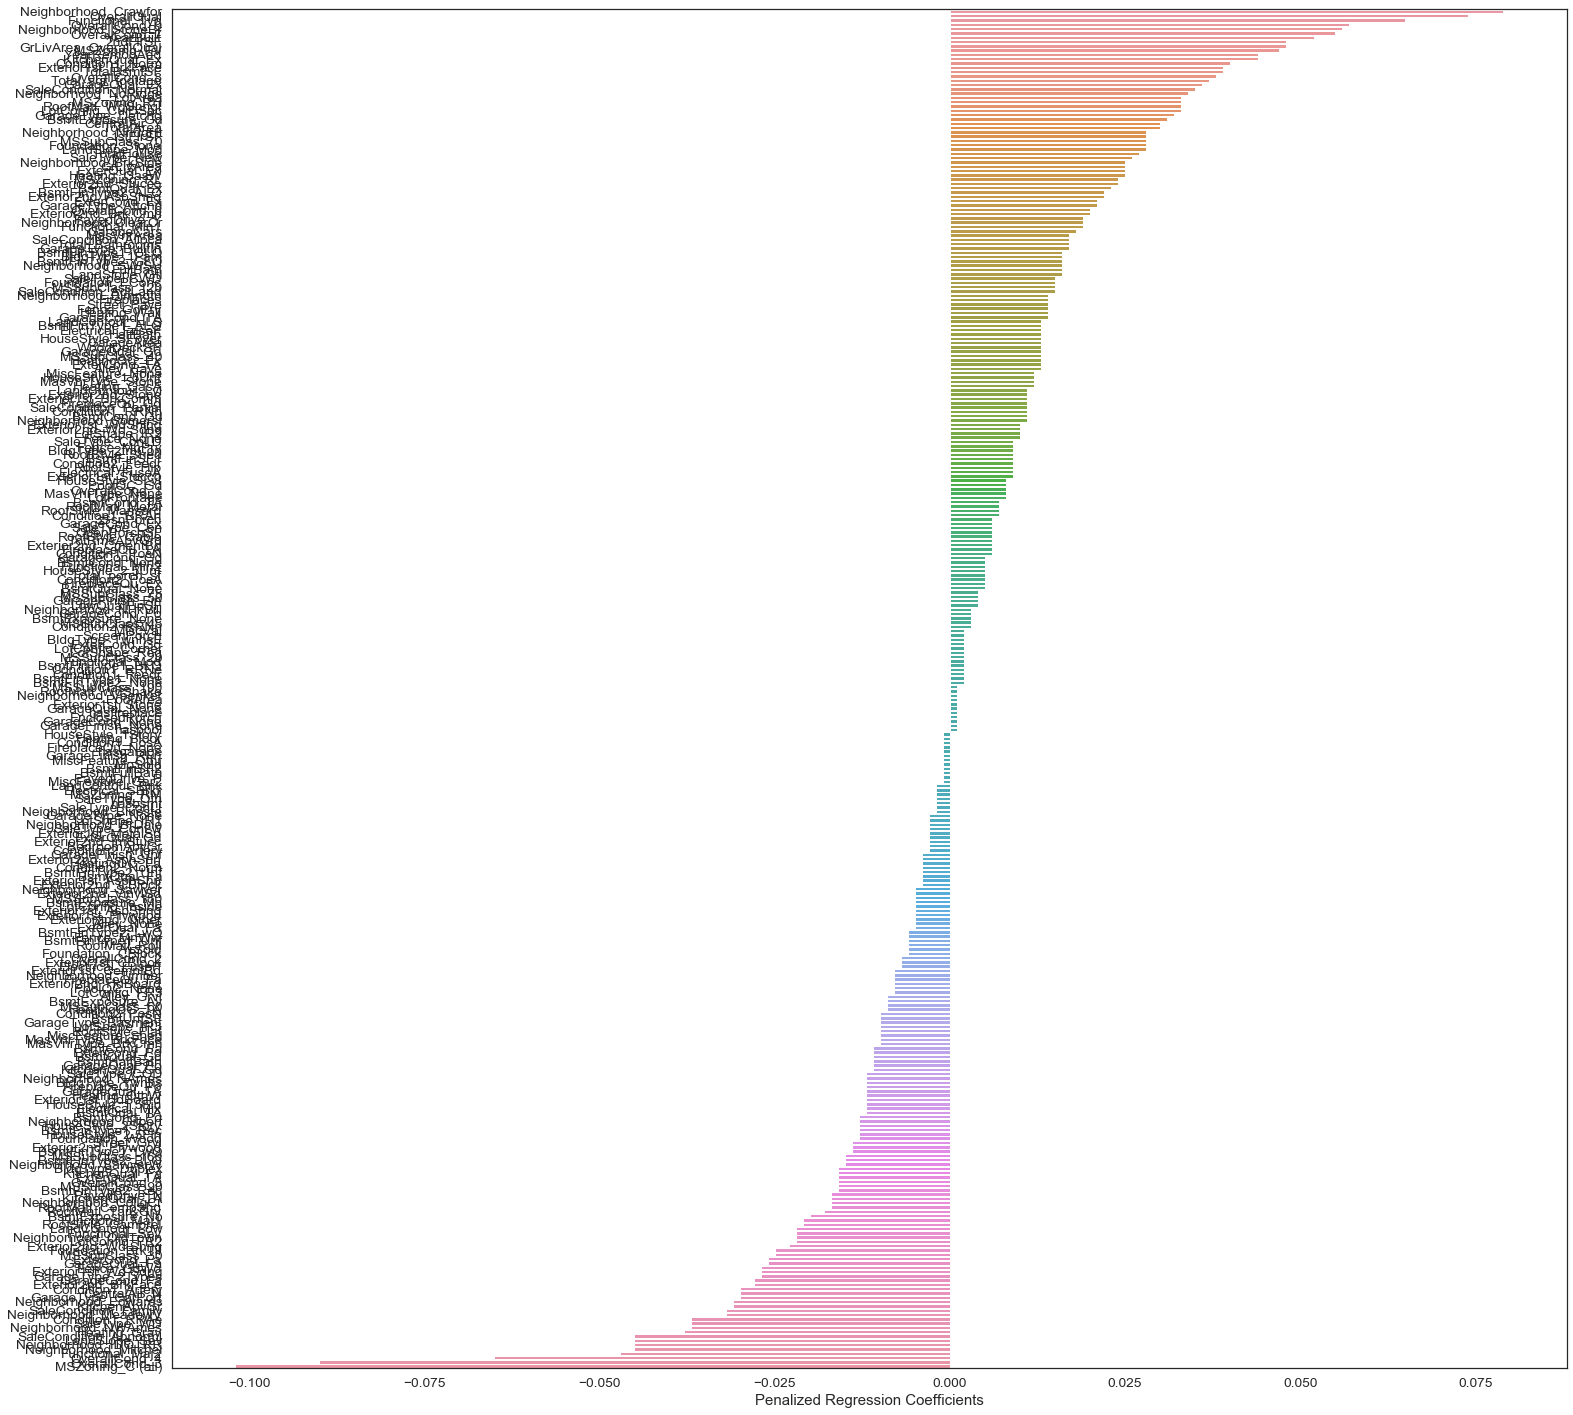

In [171]:
ridge_coef = pd.DataFrame(np.round_(ridge_model2.steps[1][1].coef_, decimals=3), 
one_hot_encoding_test.columns, columns = ["penalized_regression_coefficients"])
# remove the non-zero coefficients
ridge_coef = ridge_coef[ridge_coef['penalized_regression_coefficients'] != 0]
# sort the values from high to low
ridge_coef = ridge_coef.sort_values(by = 'penalized_regression_coefficients', 
ascending = False)

# plot the sorted dataframe
fig = plt.figure(figsize = (25,25))
ax = sns.barplot(x = 'penalized_regression_coefficients', y= ridge_coef.index , 
data=ridge_coef)
ax.set(xlabel='Penalized Regression Coefficients')

[Text(0.5, 0, 'Penalized Regression Coefficients')]

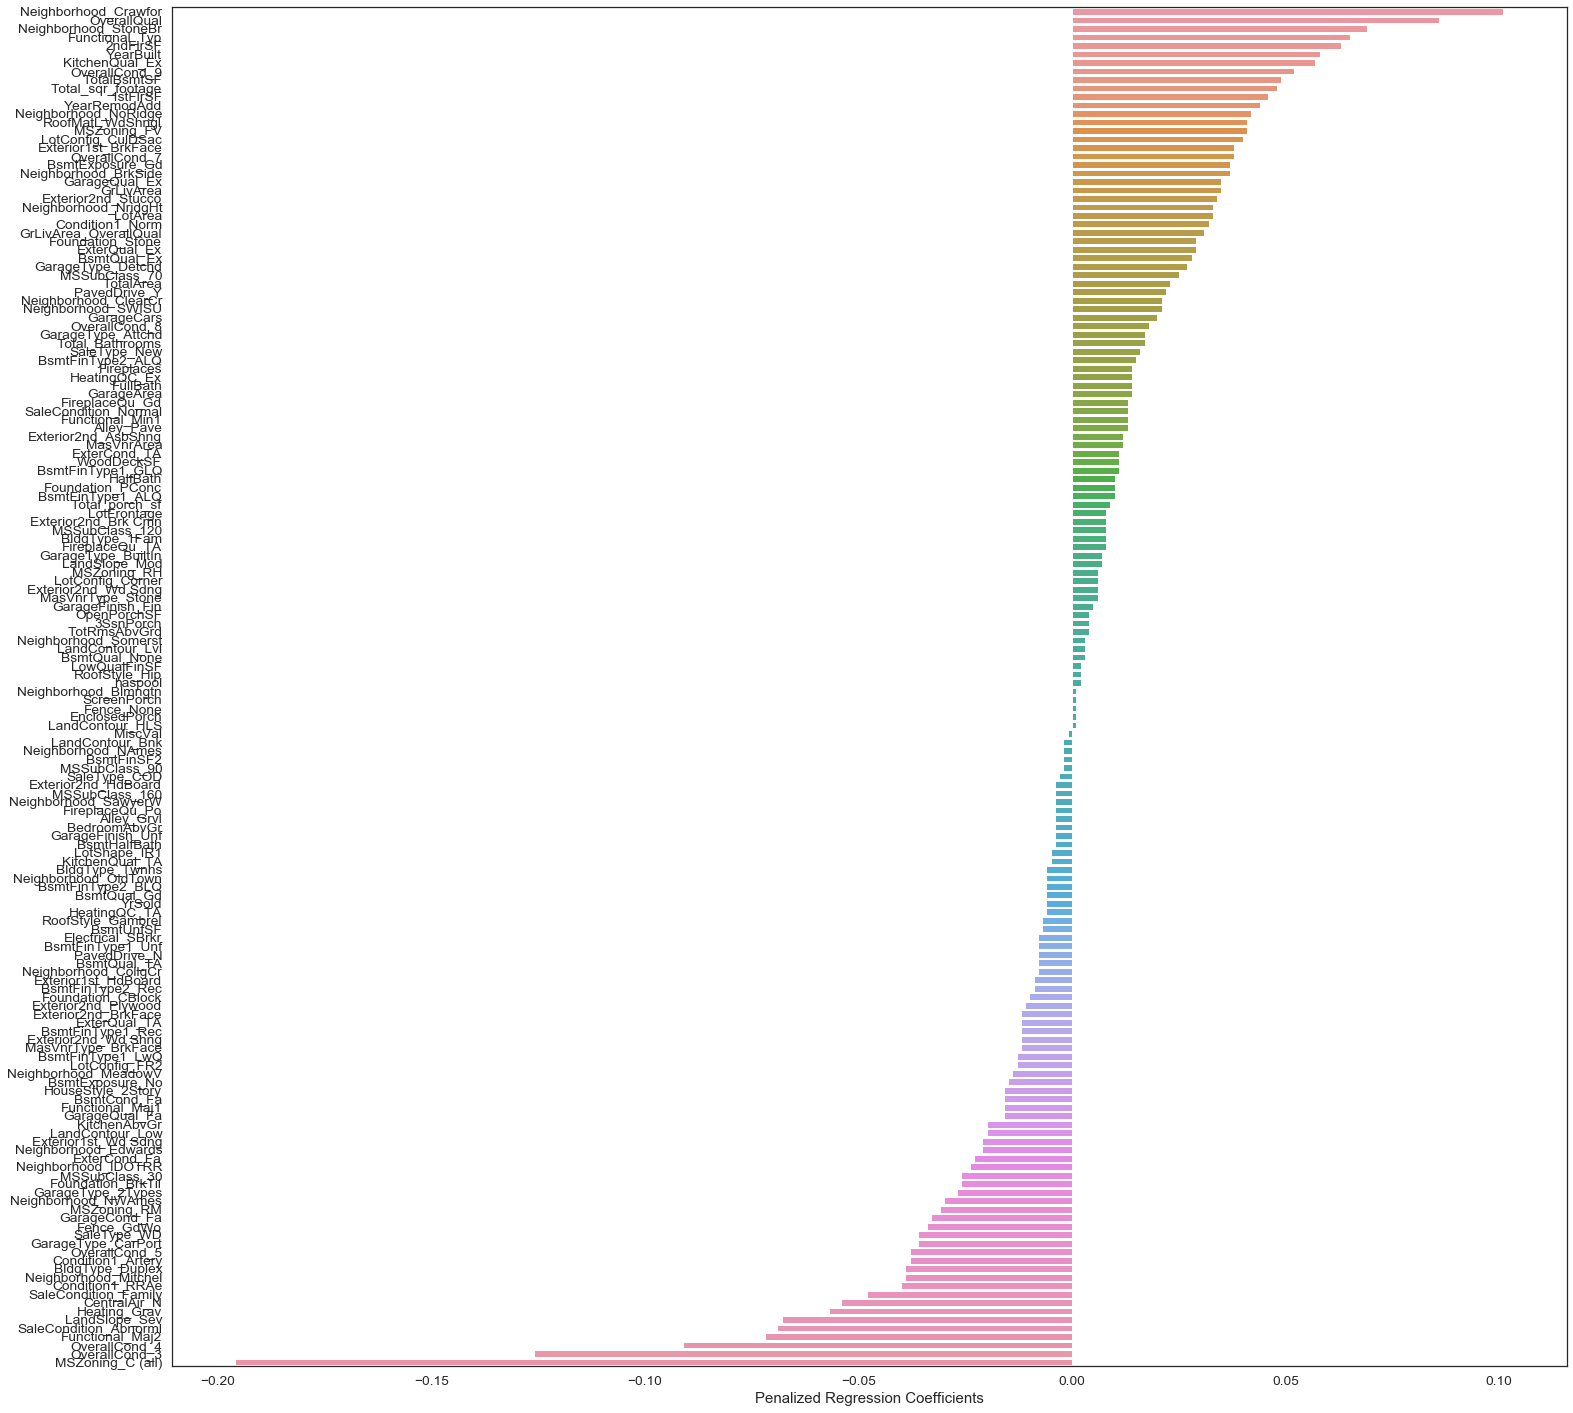

In [172]:
lasso_coef = pd.DataFrame(np.round_(lasso_model2.steps[1][1].coef_, decimals=3), 
one_hot_encoding_test.columns, columns = ["penalized_regression_coefficients"])
# remove the non-zero coefficients
lasso_coef = lasso_coef[lasso_coef['penalized_regression_coefficients'] != 0]
# sort the values from high to low
lasso_coef = lasso_coef.sort_values(by = 'penalized_regression_coefficients', 
ascending = False)

# plot the sorted dataframe
fig = plt.figure(figsize = (25,25))
ax = sns.barplot(x = 'penalized_regression_coefficients', y= lasso_coef.index , 
data=lasso_coef)
ax.set(xlabel='Penalized Regression Coefficients')

In [173]:
from sklearn.linear_model import ElasticNetCV

e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(one_hot_encoding_train, y_reg)
print("elastic model rmse : ",cv_rmse(elastic_model3).mean())

elastic model rmse :  0.08332876099976945


In [174]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb3 = XGBRegressor(learning_rate =0.01, n_estimators=5200, max_depth=3,
                     min_child_weight=0 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.7,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_fit = xgb3.fit(one_hot_encoding_train, y_reg)
print("Xgboost model rmse : ",cv_rmse(xgb_fit).mean())

[15:31:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:31:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [ ]:
model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.01, n_estimators=5000,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

lgbm_fit = model.fit(one_hot_encoding_train, y_reg)
print("lightgbm model rmse : ",cv_rmse(model).mean())

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = one_hot_encoding_test.columns
feature_importance_df["importance"] = model.feature_importances_

In [ ]:
cols = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [ ]:
train_ridge_preds = ridge_model2.predict(one_hot_encoding_train)
train_lasso_preds = lasso_model2.predict(one_hot_encoding_train)
train_elastic_preds = elastic_model3.predict(one_hot_encoding_train)
train_xgb_preds = xgb_fit.predict(one_hot_encoding_train)
train_lgbm_preds = lgbm_fit.predict(one_hot_encoding_train)

stackX = pd.DataFrame(np.transpose(np.array([train_ridge_preds,train_lasso_preds,train_elastic_preds,train_xgb_preds,train_lgbm_preds])))

model = lgb.LGBMRegressor(objective='regression',num_leaves=5,  
                              learning_rate=0.01, n_estimators=4500,  
                              max_bin = 55, bagging_fraction = 0.8,  
                              bagging_freq = 5, feature_fraction = 0.2319,  
                              feature_fraction_seed=9, bagging_seed=9,  
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)  

stack_fit = model.fit(stackX, y_reg)

In [ ]:
print("lightgbm model rmse : ",cv_rmse(model).mean())

In [ ]:
test_ridge_preds = ridge_model2.predict(one_hot_encoding_test)
test_lasso_preds = lasso_model2.predict(one_hot_encoding_test)
test_elastic_preds = elastic_model3.predict(one_hot_encoding_test)
test_xgb_preds = xgb_fit.predict(one_hot_encoding_test)
test_lgbm_preds = lgbm_fit.predict(one_hot_encoding_test)

In [ ]:
test_stackX = pd.DataFrame(np.transpose(np.array([test_ridge_preds,test_lasso_preds,test_elastic_preds,test_xgb_preds,test_lgbm_preds])))
stack_pred = np.expm1(stack_fit.predict(test_stackX))
submission = pd.DataFrame({'Id': Id, 'SalePrice': stack_pred})
submission.to_csv('LGB_stacking.csv', index=False)